In [3]:
import numpy as np
import pandas as pd


df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')
df

# 나이키 vs 아디다스 신발 데이터
# 총 column 항목 8개 (순차적으로 나열)
# Product Name, Product ID, Listing Price, Sale Price, Discount, Brand, Rating, Reviews

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [33]:
# 폰트 추가
import matplotlib.font_manager as fm
import matplotlib

font_path = '/Library/Fonts/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [40]:
print(f'총 제품 수: {len(df['Brand'])} 개')
print(f'총 나이키 제품 수: {len(df[df['Brand'] == 'Nike'])} 개')
print(f'총 아디다스 제품 수: {len(df[df['Brand'].str.contains('Adidas')])} 개')

총 제품 수: 3268 개
총 나이키 제품 수: 643 개
총 아디다스 제품 수: 2625 개


In [4]:
nike = df[df['Brand'] == 'Nike']
nike

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [5]:
adidas = df[df['Brand'].str.contains('Adidas')]
adidas

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,EF3503,10999,10999,0,Adidas SPORT PERFORMANCE,4.9,47
2621,Men's adidas Cricket Howzat Shoes,EF3505,6999,6999,0,Adidas SPORT PERFORMANCE,4.4,30
2622,Men's Cricket Cri Hase Shoes,CM6008,3999,3999,0,Adidas SPORT PERFORMANCE,2.0,87
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,BC0980,7999,7999,0,Adidas SPORT PERFORMANCE,4.6,6


In [37]:
nike.info()         # 나이키 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 2625 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   643 non-null    object 
 1   Product ID     643 non-null    object 
 2   Listing Price  643 non-null    int64  
 3   Sale Price     643 non-null    int64  
 4   Discount       643 non-null    int64  
 5   Brand          643 non-null    object 
 6   Rating         643 non-null    float64
 7   Reviews        643 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 45.2+ KB


In [38]:
adidas.info()       # 아디다스 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Index: 2625 entries, 0 to 2624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   2625 non-null   object 
 1   Product ID     2625 non-null   object 
 2   Listing Price  2625 non-null   int64  
 3   Sale Price     2625 non-null   int64  
 4   Discount       2625 non-null   int64  
 5   Brand          2625 non-null   object 
 6   Rating         2625 non-null   float64
 7   Reviews        2625 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 184.6+ KB


In [6]:
# 나이키 제품 ID로 오름차순 정렬
nike_sorted = nike.sort_values(by='Product ID', ascending=True)
nike_sorted     # 제품 ID 달라도 이름 중복 확인

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3062,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
2751,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,4.5,24
2833,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
3124,Air Jordan OG,133000-106,0,11995,0,Nike,0.0,0
2750,Air Jordan 10 Retro,310805-137,0,15995,0,Nike,4.7,223
...,...,...,...,...,...,...,...,...
2767,Nike Air Max 2090,CW4286-100,0,11995,0,Nike,0.0,0
2994,Air Jordan 13 Retro Chinese New Year,CW4409-100,0,19995,0,Nike,5.0,1
2978,Jordan 'Why Not?' Zer0.2 SE,CW6565-900,0,11995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0


In [7]:
# 아디다스 제품 ID로 오름차순 정렬
adidas_sorted = adidas.sort_values(by='Product ID', ascending=True)
adidas_sorted   # 제품 ID 달라도 이름 중복 확인

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2308,Men's Originals Summer Adilette Slippers,280648,2999,2999,0,Adidas ORIGINALS,4.2,54
2309,Men's Originals Summer Adilette Slides,288022,2999,2999,0,Adidas ORIGINALS,3.3,95
91,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7042,9999,4999,50,Adidas ORIGINALS,3.1,49
1664,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7043,9999,4999,50,Adidas ORIGINALS,2.4,49
2086,men's ADIDAS ORIGINALS PW HU HOLI STAN SMITH S...,AC7044,9999,4999,50,Adidas ORIGINALS,3.7,78
...,...,...,...,...,...,...,...,...
1725,Men's adidas Originals STAN SMITH Low Shoes,S75104,7599,5319,30,Adidas ORIGINALS,4.9,70
2525,Men's Swim Adilette Supercloud Plus Thongs,S78048,3299,1649,50,Adidas CORE / NEO,4.1,13
1018,Women's adidas RUNNING cosmic 2 Low Shoes,S80662,5999,2400,60,Adidas CORE / NEO,2.0,28
1536,WoMEN'S adidas Outdoor TERREX VOYAGER DLX SHOES,S80807,7999,3200,60,Adidas SPORT PERFORMANCE,4.2,43


In [8]:
# 나이키 신발 제품명 당 제품 수
nike_product_counts = nike['Product Name'].value_counts()
nike_product_counts

Product Name
Nike Air Max 90                              14
Nike Air Max 270 React                        9
Nike Air Max 97                               7
Nike Air Zoom Pegasus 36                      6
Nike Air Max 2090                             5
                                             ..
Nike Mercurial Vapor 13 Club MG               1
Nike Zoom Pegasus Turbo 2 Special Edition     1
Nike Tiempo Legend 8 Academy TF               1
Air Jordan 8 Retro                            1
Nike P-6000 SE                                1
Name: count, Length: 393, dtype: int64

In [9]:
# 아디다스 신발 제품명 당 제품 수
adidas_product_counts = adidas['Product Name'].value_counts()
adidas_product_counts

Product Name
Men's adidas Originals Supercourt Shoes                 16
Women's adidas Originals Sambarose Shoes                16
Men's adidas Originals Stan Smith Shoes                 15
Men's adidas Originals Continental 80 Shoes             14
Unisex adidas Originals Marathon Tech Shoes             13
                                                        ..
Unisex adidas Basketball Harden Stepback Shoes           1
Kids-Unisex adidas Tennis Adizero Club Shoes             1
Men's Basketball Harden Vol. 4 GCA - Forbidden Shoes     1
Women's adidas Sport Inspired Storm Runner Shoes         1
Unisex adidas Outdoor Terrex Daroga Water Shoes          1
Name: count, Length: 1138, dtype: int64

In [25]:
# 나이키 신발 제품명 중복값 제거
# nike_drop_duplicated = nike.drop_duplicates(subset=['Product Name'], keep='first')
nike_drop_only_duplicated_jin = nike.drop_duplicates(subset=['Product Name'], keep='first')
nike_drop_duplicated = nike_drop_only_duplicated_jin[nike_drop_only_duplicated_jin['Rating'] > 1]

# 나이키 신발 제품수 393개
# print(nike_drop_duplicated.count())

# 나이키 신발 전체 소문자로 변경
def trans_small(text):
        words = text.split()
        return ' '.join(words[:]).lower()  # 성별 표시 제거
nike_drop_duplicated['Product Name'] = nike_drop_duplicated['Product Name'].apply(trans_small)

# 나이키 신발 제품명
print(nike_drop_duplicated['Product Name'])

2633                    nike zoom pegasus turbo 2
2634                   nike air max 270 react eng
2635                              nike air max 90
2639                  nike air vapormax flyknit 3
2640                       nike air zoom superrep
                          ...                    
3235             nike air zoom pegasus 36 flyease
3237                       nike p-6000 icon clash
3244                           nike pre-love o.x.
3255    nike zoom pegasus turbo 2 special edition
3263                           air jordan 8 retro
Name: Product Name, Length: 250, dtype: object


/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_48257/3282814848.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_drop_duplicated['Product Name'] = nike_drop_duplicated['Product Name'].apply(trans_small)


---

### 수정 필요한 부분
- UNISEX는 남녀공용이라 기존 조건에서는 없앨 필요가 없다.
- 따라서, 남녀 혹은 유니섹스같은 성별을 전부 날리고, 제품명으로 명확하게 타겟한다.

In [11]:
# 아디다스 신발 제품명 중복값 제거
adidas_drop_duplicated = adidas.drop_duplicates(subset=['Product Name'], keep='first')
adidas_drop_duplicated = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1].head(250)

# 아디다스 신발 제품수 1138개 (성별 포함)
# print(adidas_drop_duplicated.count())

# 아디다스 신발 제품명 (성별 포함)
# print(adidas_drop_duplicated['Product Name'])

# 아디다스 신발 제품명 (성별 제외)
adidas_noSex = adidas_drop_duplicated
def remove_sex(text):
        words = text.split()
        if any(gender in words[0].upper() for gender in ["WOMEN'S", "MEN'S", "UNISEX"]):
            return ' '.join(words[1:]).lower()  # 성별 표시 제거

# DataFrame의 'Product Name' 열에 적용
adidas_noSex['Product Name'] = adidas_noSex['Product Name'].apply(remove_sex)

# 아디다스 브랜드 하나로 묶기
adidas_noSex['Brand'] = adidas_noSex['Brand'].replace(r'(?i)adidas.*', 'Adidas', regex=True)

print(adidas_noSex['Product Name'])

0      adidas originals nmd_racer primeknit shoes
1                    adidas originals sleek shoes
2                       adidas swim puka slippers
3        adidas sport inspired questar ride shoes
4                adidas originals taekwondo shoes
                          ...                    
519                       originals kiellor shoes
521            adidas originals sl andridge shoes
528                         originals sleek shoes
534                       originals gazelle shoes
536                  adidas running lace it shoes
Name: Product Name, Length: 250, dtype: object


### 논리적 구조 (인기순위: 평점별)
- 대체로 평점이 높으면 인기가 좋다
- 그러나 평점만 높다고 반드시 인기가 좋은 것은 아니다
- 리뷰도 악성리뷰가 많은 경우가 있을 수 있다
- 따라서 메인 조건을 평점으로, 서브 조건을 리뷰로 건다
    - 따라서 groupby('제품명')['판매량'].sort_values(ascending=True).sum()으로 1차 필터
    - '제품명당 판매량'에 평점 내림차순 적용
        - 평점당 상위 10개 제품 시각화
        - '제품명당 판매량'과 평점간의 상관관계 시각화
    - '제품명당 판매량'에 리뷰 내림차순 적용
        - 리뷰수 상위 10개 제품 시각화
        - '제품명당 판매량'과 리뷰간의 상관관계 시각화

### 아디다스 리뷰&레이팅 수 마지막 추가했음

In [30]:
# print(pd.DataFrame(nike))

# 결측치 확인 과정
nike_num = nike_drop_duplicated['Reviews'].count()
print(f'총 나이키 제품 수: {nike_num} 개')
nike_review = nike_drop_duplicated[nike_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 리뷰 수: {nike_review} (결측치: {nike_num - nike_review})")
nike_rating = nike_drop_duplicated[nike_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 레이팅 수: {nike_rating} (결측치: {nike_num - nike_rating})")
nike_rr2 = nike_drop_duplicated[(nike_drop_duplicated['Rating'] > 1 ) & (nike_drop_duplicated['Reviews'] > 1) ]['Brand'].count()
print(f"0을 제외한 나이키 리뷰&레이팅 수: {nike_rr2} (결측치: {nike_num - nike_rr2})")

nike_price = nike_drop_duplicated[nike_drop_duplicated['Listing Price'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 가격 수: {nike_price} (결측치: {nike_num - nike_price})")
nike_rr = nike_drop_duplicated[(nike_drop_duplicated['Sale Price'] > 1 )]['Brand'].count()
print(f"0을 제외한 나이키 할인 가격 수: {nike_rr} (결측치: {nike_num - nike_rr})")
nike_discount = nike_drop_duplicated[nike_drop_duplicated['Discount'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 할인 수: {nike_discount} (결측치: {nike_num - nike_discount})")

print()

adidas_num = adidas_drop_duplicated['Reviews'].count()
print(f'총 아디다스 제품 수: {adidas_num} 개')
adidas_review = adidas_drop_duplicated[adidas_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 리뷰 수: {adidas_review} (결측치: {adidas_num - adidas_review})")
adidas_rating = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 레이팅 수: {adidas_rating} (결측치: {adidas_num - adidas_rating})")
adidas_rr = adidas_drop_duplicated[(adidas_drop_duplicated['Rating'] > 1 ) & (adidas_drop_duplicated['Reviews'] > 1) ]['Brand'].count()
print(f"0을 제외한 아디다스 리뷰&레이팅 수: {adidas_rr} (결측치: {adidas_num - adidas_rr})")

adidas_discount_price = adidas_drop_duplicated[(adidas_drop_duplicated['Listing Price'] > 1 )]['Brand'].count()
print(f"0을 제외한 아디다스 가격 수: {adidas_discount_price} (결측치: {adidas_num - adidas_discount_price})")
adidas_discount = adidas_drop_duplicated[(adidas_drop_duplicated['Discount'] > 1 )]['Brand'].count()
print(f"0을 제외한 아디다스 할인 수: {adidas_discount} (결측치: {adidas_num - adidas_discount})")
print()

총 나이키 제품 수: 250 개
0을 제외한 나이키 리뷰 수: 194 (결측치: 56)
0을 제외한 나이키 레이팅 수: 250 (결측치: 0)
0을 제외한 나이키 리뷰&레이팅 수: 194 (결측치: 56)
0을 제외한 나이키 가격 수: 99 (결측치: 151)
0을 제외한 나이키 할인 가격 수: 250 (결측치: 0)
0을 제외한 나이키 할인 수: 0 (결측치: 250)

총 아디다스 제품 수: 250 개
0을 제외한 아디다스 리뷰 수: 245 (결측치: 5)
0을 제외한 아디다스 레이팅 수: 250 (결측치: 0)
0을 제외한 아디다스 리뷰&레이팅 수: 245 (결측치: 5)
0을 제외한 아디다스 가격 수: 250 (결측치: 0)
0을 제외한 아디다스 할인 수: 214 (결측치: 36)



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_48257/2611126692.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=nike_price_jin, x='Brand', hue='Sale Price', color='red')
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_48257/2611126692.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(data=adidas_price_jin, x='Brand', hue='Listing Price', color='green')


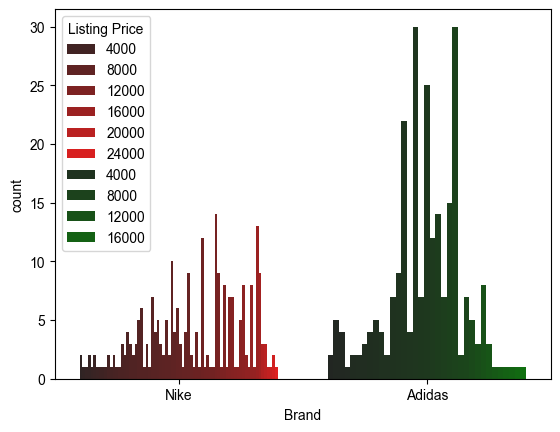

In [68]:
nike_price_jin = nike_drop_duplicated.sort_values(by='Sale Price', ascending=False)
adidas_price_jin = adidas_noSex.sort_values(by='Listing Price', ascending=False)

sns.countplot(data=nike_price_jin, x='Brand', hue='Sale Price', color='red')
sns.countplot(data=adidas_price_jin, x='Brand', hue='Listing Price', color='green')
plt.show()

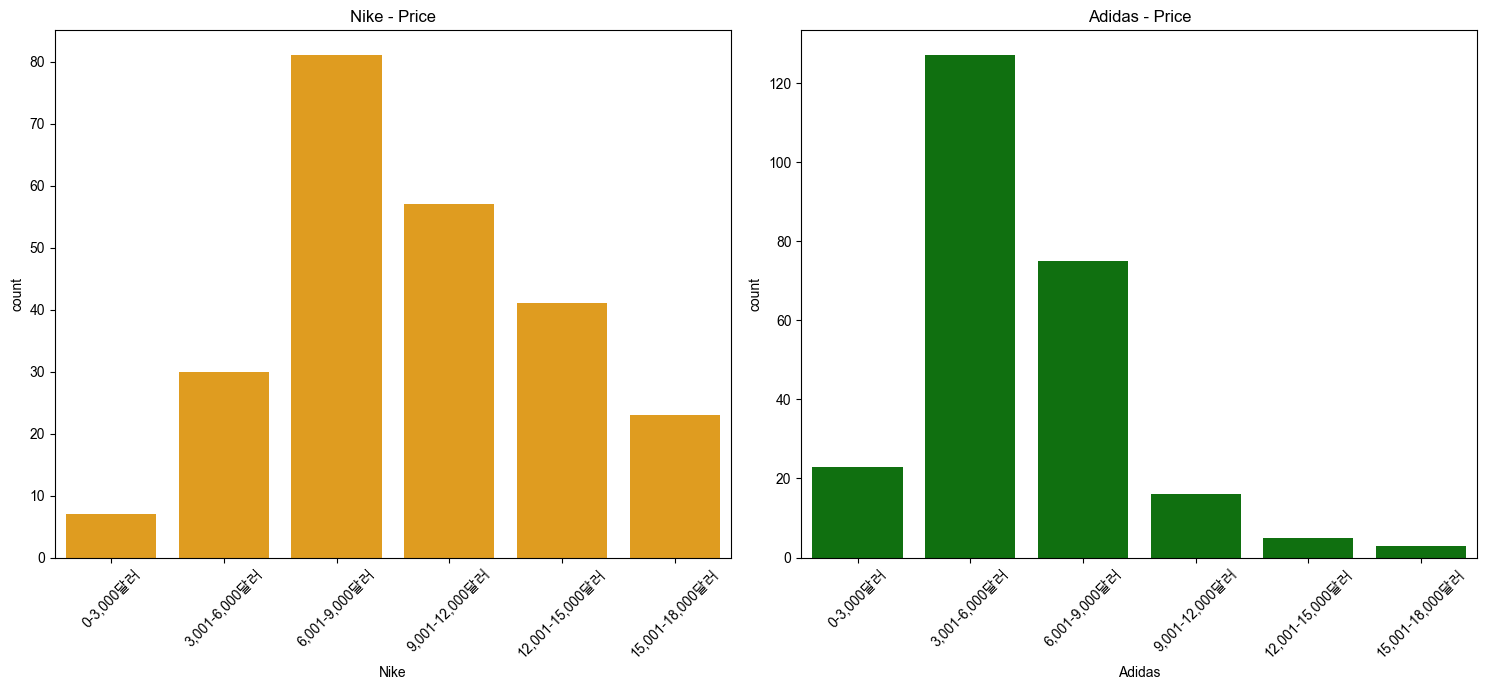

In [47]:
# 가격대 구간 생성을 위한 함수
def create_price_range(price):
    if pd.isna(price) or price == 0:
        return '가격정보 없음'
    elif price <= 3000:
        return '0-3,000달러'
    elif price <= 6000:
        return '3,001-6,000달러'
    elif price <= 9000:
        return '6,001-9,000달러'
    elif price <= 12000:
        return '9,001-12,000달러'
    elif price <= 15000:
        return '12,001-15,000달러'
    elif price <= 18000:
        return '15,001-18,000달러'
    else:
        return '18,000원 이상'

# 각 브랜드별로 가격대 범주 생성
nike_price_jin['Nike'] = nike_price_jin['Sale Price'].apply(create_price_range)
adidas_price_jin['Adidas'] = adidas_price_jin['Listing Price'].apply(create_price_range)

# 그래프 생성
plt.figure(figsize=(15, 7))

# Nike 판매가격 분포
plt.subplot(1, 2, 1)
sns.countplot(data=nike_price_jin, x='Nike', order=['0-3,000달러', '3,001-6,000달러', 
              '6,001-9,000달러', '9,001-12,000달러', '12,001-15,000달러', '15,001-18,000달러'], color='orange')
plt.title('Nike - Price')
plt.xticks(rotation=45)

# Adidas 판매가격 분포
plt.subplot(1, 2, 2)
sns.countplot(data=adidas_price_jin, x='Adidas', order=['0-3,000달러', '3,001-6,000달러', 
              '6,001-9,000달러', '9,001-12,000달러', '12,001-15,000달러', '15,001-18,000달러'], color='green')
plt.title('Adidas - Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [50]:

# 아디다스 제품목을 전체에서 돌리기 때문에 한번 더 해줌 -> 나중에 합칠 때 한번에 적용시키는 것으로 변경
########################################################################################
adidas_duplicated_noSex = adidas
def remove_sex(text):
        words = text.split()
        if any(gender in words[0].upper() for gender in ["WOMEN'S", "MEN'S", "UNISEX"]):
            return ' '.join(words[1:]).lower()  # 성별 표시 제거

# DataFrame의 'Product Name' 열에 적용
adidas_duplicated_noSex['Product Name'] = adidas_duplicated_noSex['Product Name'].apply(remove_sex)
########################################################################################

/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_48257/1827741595.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas_duplicated_noSex['Product Name'] = adidas_duplicated_noSex['Product Name'].apply(remove_sex)


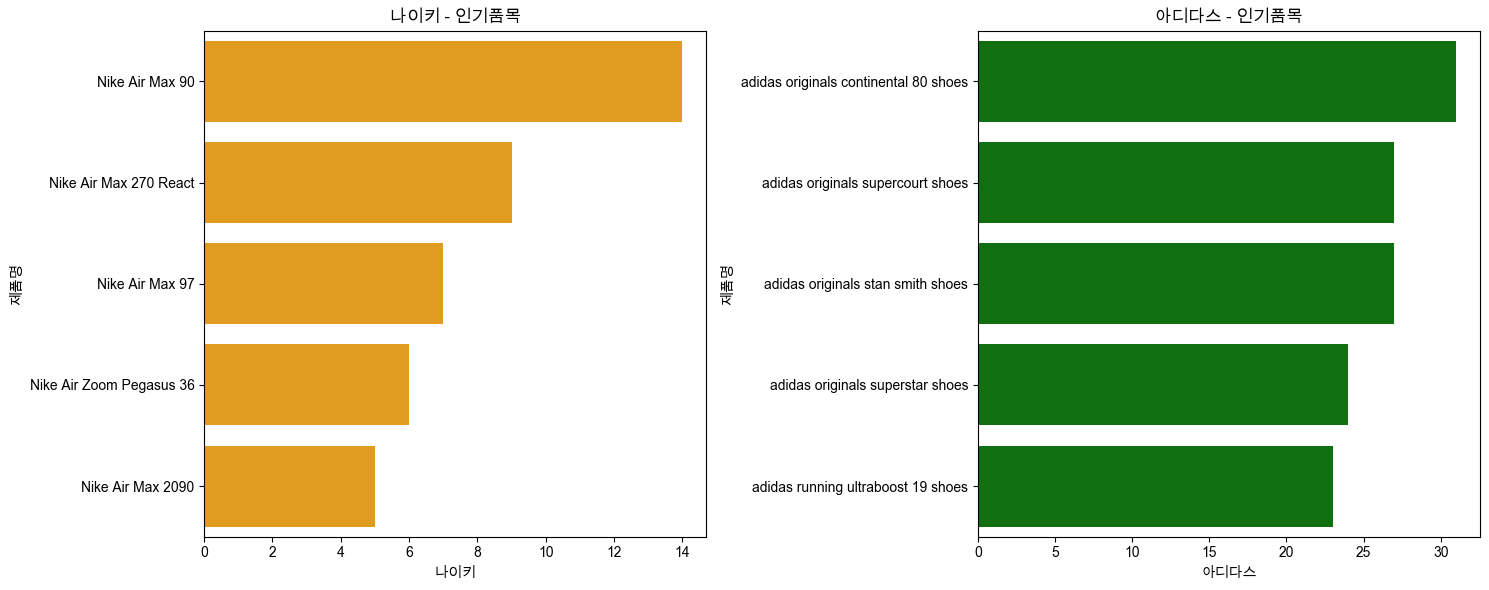

In [66]:
# 인기있는 제품 순위

# 브랜드별 Product Name count 계산
nike_top5_jin = nike['Product Name'].value_counts().head()
adidas_top5_jin = adidas_duplicated_noSex['Product Name'].value_counts().head()

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x=nike_top5_jin.values, y=nike_top5_jin.index, color='orange')
plt.title('나이키 - 인기품목')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x=adidas_top5_jin.values, y=adidas_top5_jin.index, color='green')
plt.title('아디다스 - 인기품목')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


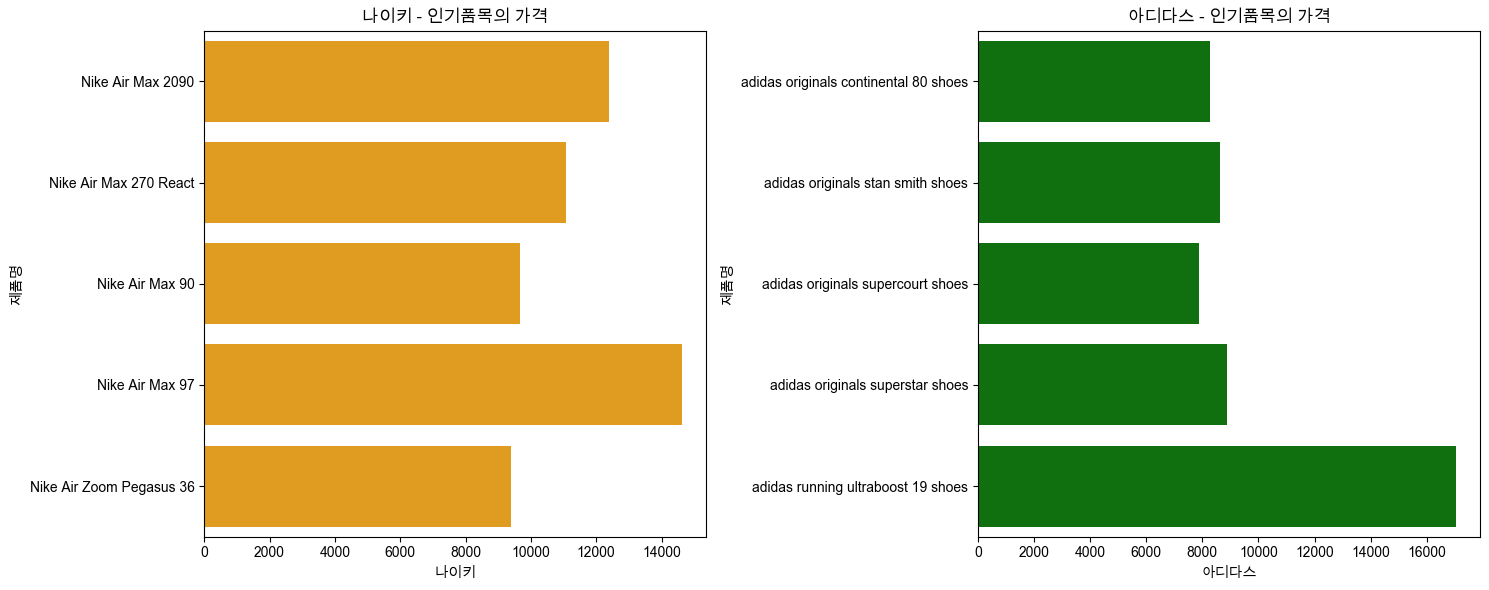

In [98]:
# 인기있는 제품의 가격

# 브랜드별 Product Name count 계산
nike_top5_jin = nike['Product Name'].value_counts().head()
adidas_top5_jin = adidas_duplicated_noSex['Product Name'].value_counts().head()

# 나이키 상위 5개 제품의 가격 정보 추출
nike_top5_prices_jin = nike[nike['Product Name'].isin(nike_top5_jin.index)].groupby('Product Name')['Sale Price'].mean()

# 아디다스 상위 5개 제품의 가격 정보 추출
adidas_top5_prices_jin = adidas_duplicated_noSex[adidas_duplicated_noSex['Product Name'].isin(adidas_top5_jin.index)].groupby('Product Name')['Listing Price'].mean()

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x=nike_top5_prices_jin.values, y=nike_top5_prices_jin.index, color='orange')
plt.title('나이키 - 인기품목의 가격')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x=adidas_top5_prices_jin.values, y=adidas_top5_prices_jin.index, color='green')
plt.title('아디다스 - 인기품목의 가격')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


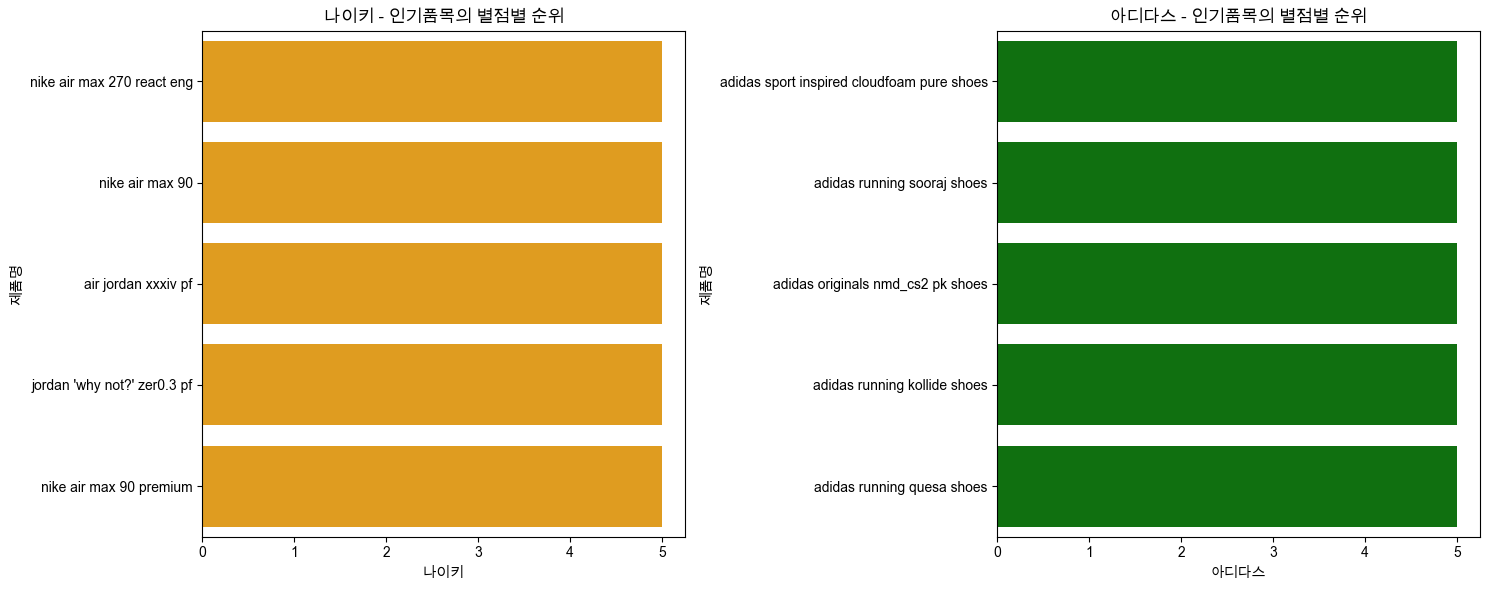

In [105]:
# 별점이 높은 제품

# 브랜드별 Product Name count 계산
nike_top5_rating_jin = nike_drop_duplicated.sort_values('Rating', ascending=False).head()
adidas_top5_rating_jin = adidas_noSex.sort_values('Rating', ascending=False).head()

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Rating', y='Product Name', data=nike_top5_rating_jin, color='orange')
plt.title('나이키 - 인기품목의 별점별 순위')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Rating', y='Product Name', data=adidas_top5_rating_jin, color='green')
plt.title('아디다스 - 인기품목의 별점별 순위')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


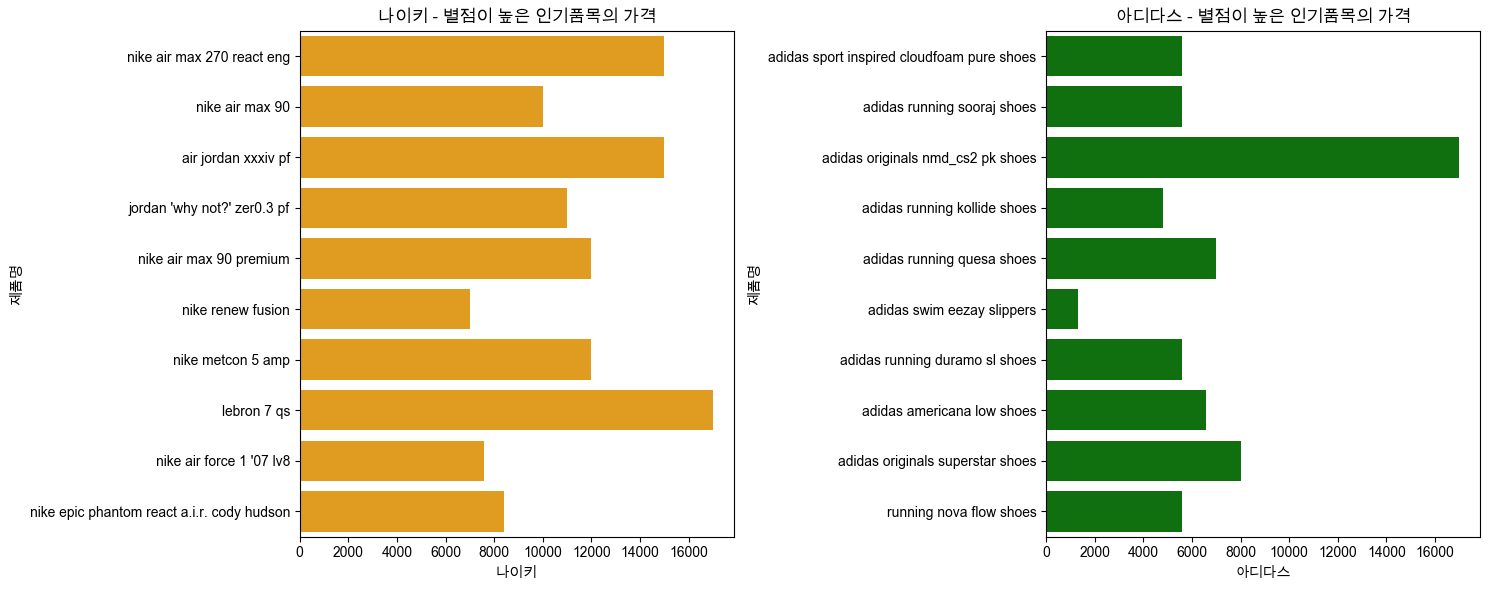

In [102]:
# 별점이 높은 제품의 가격 -> 별점은 nike가 20개 이상 5점이기 때문에 5점짜리로 확인한다.

# 브랜드별 Product Name count 계산
nike_top5_rating_jin = nike_drop_duplicated.sort_values('Rating', ascending=False).head(10)
adidas_top5_rating_jin = adidas_noSex.sort_values('Rating', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Sale Price', y='Product Name', data=nike_top5_rating_jin, color='orange')
plt.title('나이키 - 별점이 높은 인기품목의 가격')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Listing Price', y='Product Name', data=adidas_top5_rating_jin, color='green')
plt.title('아디다스 - 별점이 높은 인기품목의 가격')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


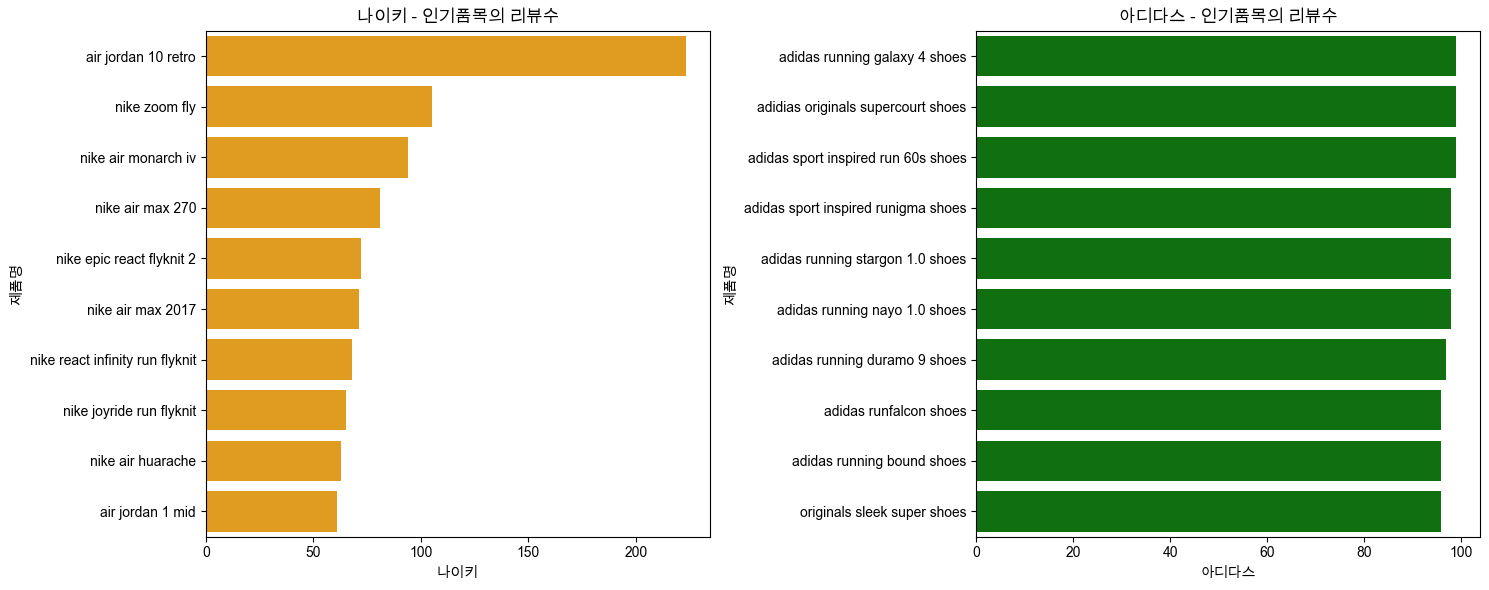

In [93]:
# 리뷰가 많은 제품

# 브랜드별 Product Name count 계산
nike_top5_review_jin = nike_drop_duplicated.sort_values('Reviews', ascending=False).head(10)
adidas_top5_review_jin = adidas_noSex.sort_values('Reviews', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Reviews', y='Product Name', data=nike_top5_review_jin, color='orange')
plt.title('나이키 - 인기품목의 리뷰수')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Reviews', y='Product Name', data=adidas_top5_review_jin, color='green')
plt.title('아디다스 - 인기품목의 리뷰수')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


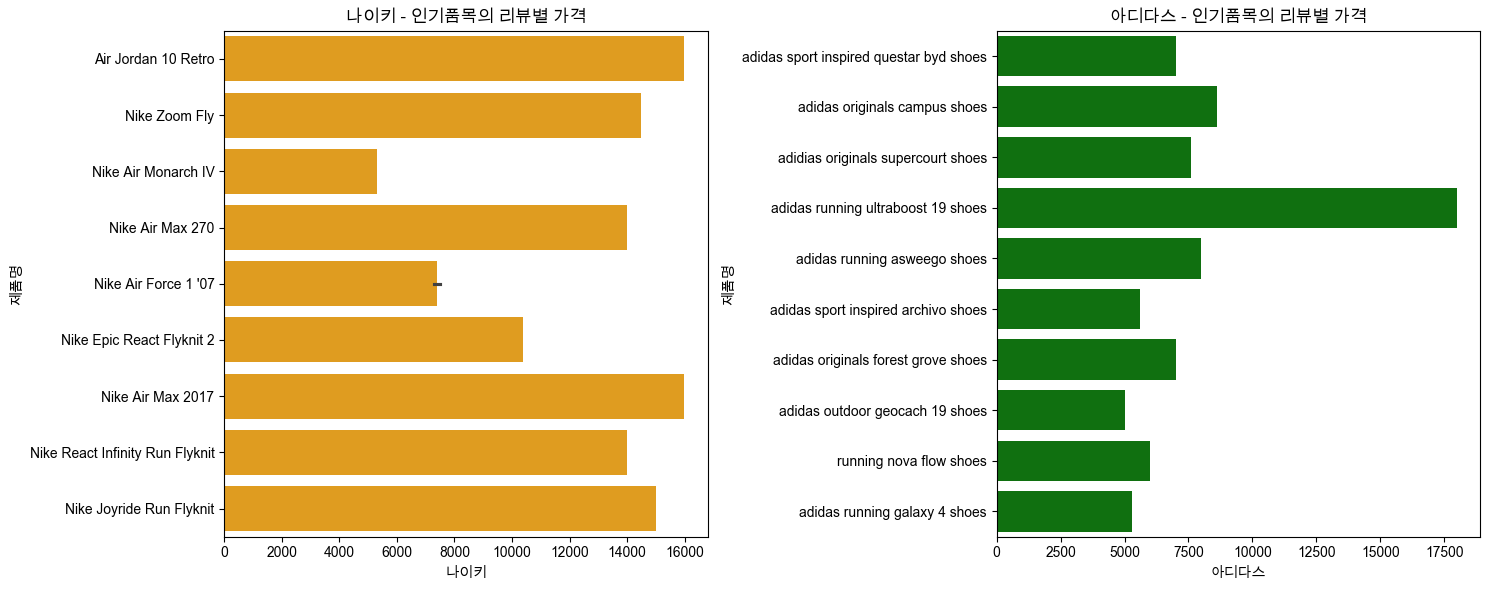

In [103]:
# 리뷰가 많은 제품의 가격

# 브랜드별 Product Name count 계산
nike_top5_review_jin = nike.sort_values('Reviews', ascending=False).head(10)
adidas_top5_review_jin = adidas_duplicated_noSex.sort_values('Reviews', ascending=False).head(10)

# 그래프 생성
plt.figure(figsize=(15, 6))

# Nike Top 5
plt.subplot(1, 2, 1)
sns.barplot(x='Sale Price', y='Product Name', data=nike_top5_review_jin, color='orange')
plt.title('나이키 - 인기품목의 리뷰별 가격')
plt.xlabel('나이키')
plt.ylabel('제품명')

# Adidas Top 5
plt.subplot(1, 2, 2)
sns.barplot(x='Listing Price', y='Product Name', data=adidas_top5_review_jin, color='green')
plt.title('아디다스 - 인기품목의 리뷰별 가격')
plt.xlabel('아디다스')
plt.ylabel('제품명')

plt.tight_layout()
plt.show()


In [ ]:
# 안녕하세요 나이키와 아디다스를 사랑하는 여러분
# 당신들이 찾는 나이키와 아디다스의 사랑받는 제품들을 모아 찾아드리는 서비스를 도와드리고 있습니다.
# 가장 인기있는 제품들을 소개해드리고, 나이키와 아디다스 제품의 가격들을 알아볼 수 있도록 열거해놨습니다.
# 여러분들이 희망하는 제품이 어떤 것인지 통계를 확인하고 찾아볼 수 있으면 좋겠습니다.